In [50]:
import pandas as pd

In [51]:
data=pd.read_csv("Customer.csv")

In [52]:
data

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


In [54]:
column_list = list(data.columns)
column_list

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

In [55]:
data.drop(columns="Profession", inplace=True)
data.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


In [56]:
data["Age Group"] = pd.cut(data["Age"], bins=[0, 18, 25, 35, 45, 55, 65, float("inf")],
                           labels=["Under 18",  "19-24", "25-34", "35-44", "45-54", "55-64", "65+"],
                           include_lowest=True)

In [57]:
data.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [58]:
data = data.dropna(subset = ["Season"])

In [59]:
data.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Items Purchased        0
Category               0
Purchase Amount        0
Shipping Type          0
Subscription Status    0
Season                 0
Country                0
Age Group              0
dtype: int64

In [60]:
data.duplicated("CustomerID").sum()

5

In [61]:
data.drop_duplicates(subset = "CustomerID", inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7692\1912555366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset = "CustomerID", inplace = True)


In [62]:
data.duplicated("CustomerID").sum()

0

In [37]:
data.duplicated("CustomerID").sum()

0

In [63]:
data.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


#Visualizations

In [64]:
import seaborn as sns

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Customer Spending')

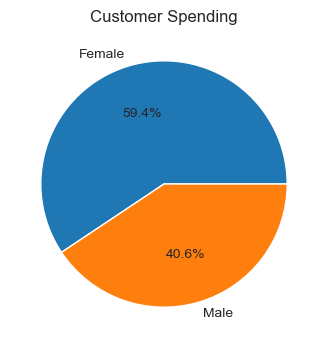

In [66]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
plt.pie(data["Gender"].value_counts(), labels = data ["Gender"].value_counts().index, autopct="%1.1f%%")
plt.title("Customer Spending")

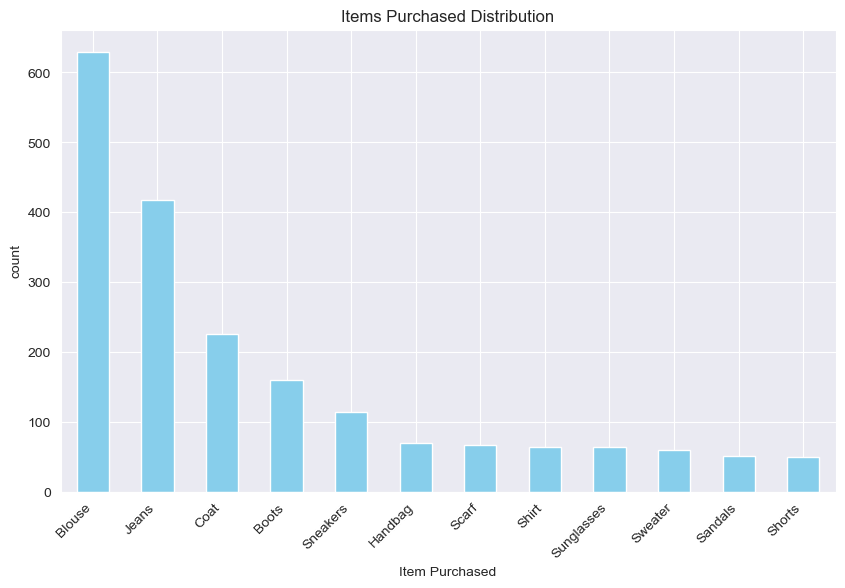

In [67]:
Items_counts = data["Items Purchased"].value_counts()

plt.figure(figsize=(10, 6))
Items_counts.plot(kind="bar", color="skyblue")
plt.title("Items Purchased Distribution")
plt.xlabel("Item Purchased")
plt.ylabel("count")
plt.xticks(rotation=45, ha="right")
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Footwear'),
  Text(2, 0, 'Outerwear'),
  Text(3, 0, 'Accessories')])

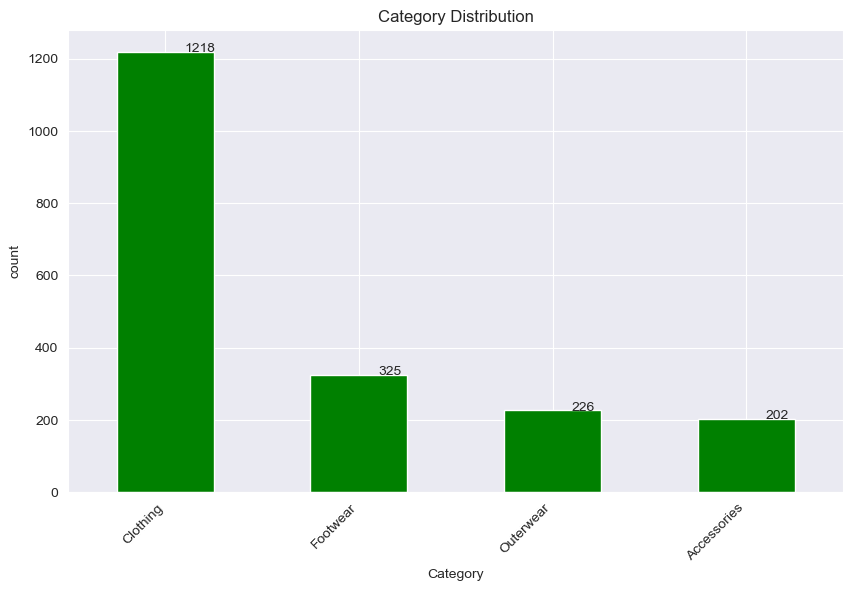

In [68]:
category_counts = data["Category"].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind="bar", color="green")

for bar, count in zip(bars.patches, category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.1, bar.get_height() + 0.05, str(count), fontsize=10)
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("count")
plt.xticks(rotation=45, ha="right")

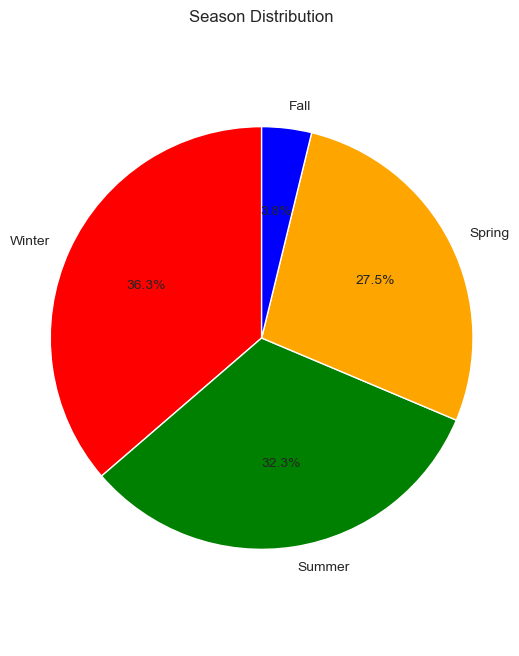

In [69]:
season_counts = data["Season"].value_counts()

plt.figure(figsize=(6, 8))
plt.pie(season_counts, labels=season_counts.index, autopct="%1.1f%%", colors=["red", "green", "orange", "blue"], startangle=90)
plt.title("Season Distribution")
plt.axis("equal")

plt.show()

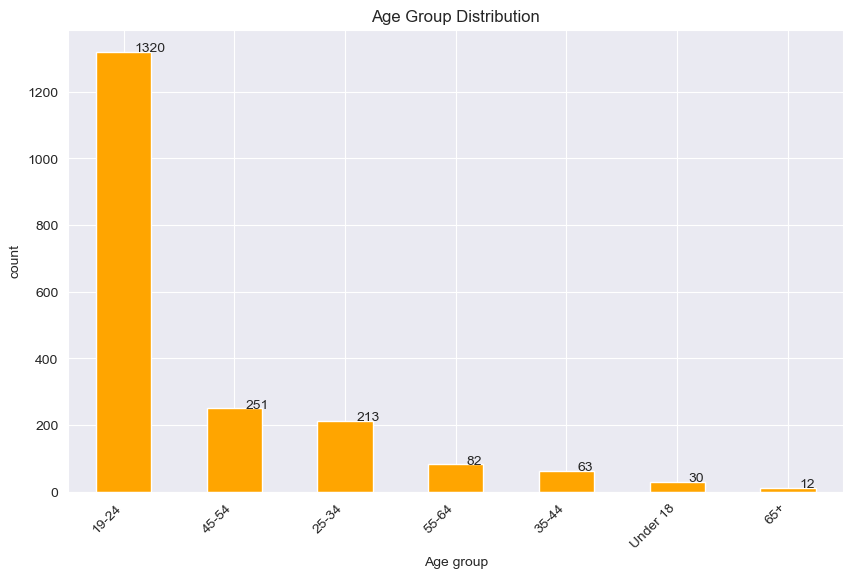

In [70]:
age_group = data["Age Group"].value_counts()

plt.figure(figsize=(10, 6))
bars = age_group.plot(kind="bar", color="orange")

for bar, count in zip(bars.patches, age_group):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.1, bar.get_height() + 0.05, str(count), fontsize=10)
plt.title("Age Group Distribution")
plt.xlabel("Age group")
plt.ylabel("count")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7692\176853879.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = data.pivot_table(index="Age Group", columns="Gender", aggfunc="size", fill_value=0)


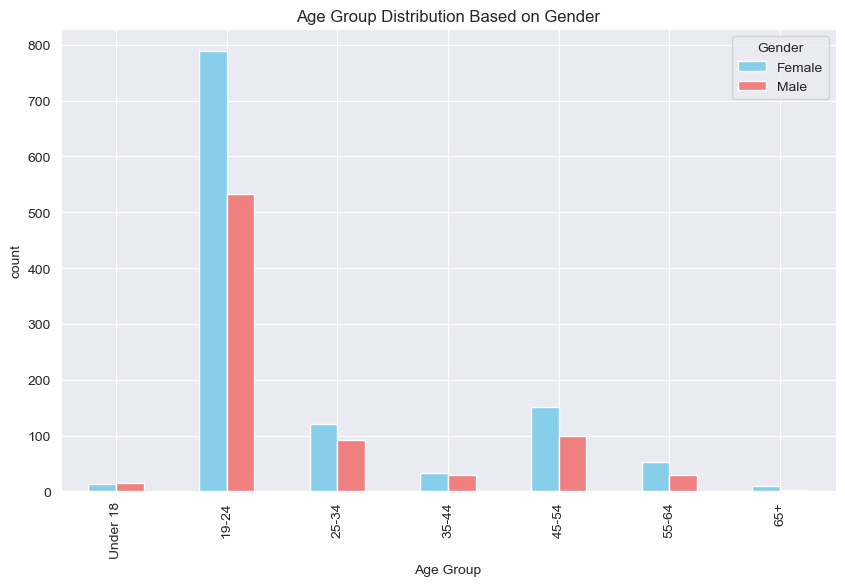

In [72]:
pivot_data = data.pivot_table(index="Age Group", columns="Gender", aggfunc="size", fill_value=0)

ax = pivot_data.plot(kind="bar", color=["skyblue", "lightcoral"], figsize=(10, 6))

ax.set_title("Age Group Distribution Based on Gender")
ax.set_xlabel("Age Group")
ax.set_ylabel("count")
ax.legend(title="Gender")

plt.show()